In [40]:
# importing the custom module by adding it to the python path
import sys
sys.path.insert(1, './libppj') # adding to the path

from ppj_graph import PPjGraph as G

# creating graph object
g=G(8)

# adding nodes of graph
g.addNode('S')
g.addNode('A')
g.addNode('B')
g.addNode('C')
g.addNode('D')
g.addNode('E')
g.addNode('F')
g.addNode('G')

# declaring start and goal node
startNode = 'S'
goalNode = 'G'

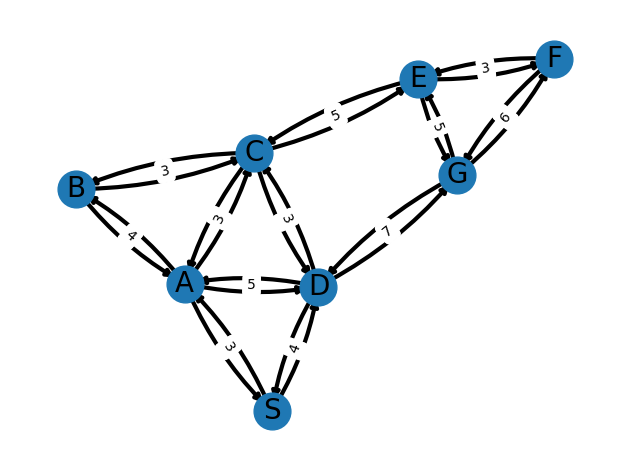

In [41]:
# adding edges
g.addEdge('S', 'A', 3)
g.addEdge('A', 'S', 3)

g.addEdge('S', 'D', 4)
g.addEdge('D', 'S', 4)

g.addEdge('A', 'D', 5)
g.addEdge('D', 'A', 5)

g.addEdge('A', 'B', 4)
g.addEdge('B', 'A', 4)

g.addEdge('C', 'A', 3)
g.addEdge('A', 'C', 3)

g.addEdge('C', 'B', 3)
g.addEdge('B', 'C', 3)

g.addEdge('C', 'D', 3)
g.addEdge('D', 'C', 3)

g.addEdge('E', 'C', 5)
g.addEdge('C', 'E', 5)

g.addEdge('G', 'D', 7)
g.addEdge('D', 'G', 3)

g.addEdge('E', 'G', 8)
g.addEdge('G', 'E', 5)

g.addEdge('F', 'E', 3)
g.addEdge('E', 'F', 5)

g.addEdge('G', 'F', 5)
g.addEdge('F', 'G', 6)

# plotting the graph
g.plotGraph()

# Breadth-First Search

In [42]:
# importing query
from ppj_queue import PPjQueue as Q

# defining a method
def bfs(g:G, startNode):
    
#     creating queue
    q = Q()
#     adding to queue
    q.enqueue(startNode)

#     creating empty list
    closedList = []
    
#     add to list
    closedList.append(startNode)
    
#     looping till the queue is empty
    while not q.isEmpty():
        
#         removing current node
        currentNode = q.dequeue()[0]
        print(currentNode, end=' ')
        
#         breaking when goal node is reached
        if goalNode == currentNode:
            break;
        
#         adding successor to the queue
        for succ in g.successor(currentNode):
        
#         checking for already visited nodes
            if succ not in closedList:
                closedList.append(succ)
                q.enqueue(succ)

In [43]:
bfs(g, 'S')

S A D B C G 

# Depth-First Search

In [44]:
from ppj_stack import PPjStack as S

# creating a ethod
def dfs(g:G, startNode):

#     creating stack
    s = S()
    
#     adding to the stack
    s.push(startNode)

#     creating empty list
    closedList = []
    
#     adding to the list
    closedList.append(startNode)
    
#     looping till stack is empty
    while not s.isEmpty():
        
#         removing current node from stack
        currentNode = s.pop()[0]
        print(currentNode, end = ' ')
        
#         breaking when goal node reached
        if goalNode == currentNode:
            break;
        
#         adding successor to the stack
        for succ in g.successor(currentNode):
        
#         checking for already visited stack
            if succ not in closedList:
                closedList.append(succ)
                s.push(succ)

In [45]:
dfs(g, 'S')

S D G 

# Heuristic Values

In [46]:
g.setGoalCost('S', 11.9)
g.setGoalCost('A', 10.4)
g.setGoalCost('B', 6.7)
g.setGoalCost('C', 4.0)
g.setGoalCost('D', 8.9)
g.setGoalCost('E', 6.9)
g.setGoalCost('F', 3.0)
g.setGoalCost('G', 0.0)

In [47]:
print(g.goalCosts)

{'S': 11.9, 'A': 10.4, 'B': 6.7, 'C': 4.0, 'D': 8.9, 'E': 6.9, 'F': 3.0, 'G': 0.0}


In [54]:
def greedyBFS(graph : G, startNode, goalNode):
    
    currentNode = startNode
    
    closedList = []
    
    print("|{:<12}|{:^20}|{:^20}|{:^12}|{:>12}|".format("currentNode", "Successor", "Costs", "Minimun Cost",
                                                        "Minimum Goal Node"))
        
    while not currentNode == goalNode:
        
        closedList.append(currentNode)
        validSuccessors = []
        
        for succ in graph.successor(currentNode):
            
            if succ not in closedList:
                validSuccessors.append(succ)
                
        if not succ for succ in graph.successor(currentNode):
            minGoalCostNode.pop()
            currentNode = minGoalCostNode
            continue
            
                
        goalCosts = [graph.goalCosts[node] for node in validSuccessors]
        
        minGoalCost = min(goalCosts)
        
        minGoalCostNode = validSuccessors[goalCosts.index(minGoalCost)]
        
        print("|{:<12}|{:^20}|{:^20}|{:^12}|{:>12}|".format(currentNode, ' '.join(validSuccessors), 
                                                            ' '. join([str(cost) for cost in goalCosts]),
                                                                      minGoalCost, minGoalCostNode))
        
        currentNode = minGoalCostNode

SyntaxError: invalid syntax (3458678282.py, line 20)

In [49]:
greedyBFS(g, 'S', 'G')

|currentNode |     Successor      |       Costs        |Minimun Cost|Minimum Goal Node|
|S           |        A D         |      10.4 8.9      |    8.9     |           D|
|D           |       A C G        |    10.4 4.0 0.0    |    0.0     |           G|


In [52]:
greedyBFS(g, 'B', 'G')

|currentNode |     Successor      |       Costs        |Minimun Cost|Minimum Goal Node|
|B           |        A C         |      10.4 4.0      |    4.0     |           C|
|C           |       A D E        |    10.4 8.9 6.9    |    6.9     |           E|
|E           |        F G         |      3.0 0.0       |    0.0     |           G|


In [53]:
greedyBFS(g, 'A', 'G')

|currentNode |     Successor      |       Costs        |Minimun Cost|Minimum Goal Node|
|A           |      S B C D       |  11.9 6.7 4.0 8.9  |    4.0     |           C|
|C           |       B D E        |    6.7 8.9 6.9     |    6.7     |           B|


ValueError: min() arg is an empty sequence